In [17]:
# Librairies utiles
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.core.display import Image, display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV

# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement"
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible
%store -r  activity_dataset_analysed

In [10]:
# cration d'un jeu de données de test et d'entrainement
source_train, source_test, cible_train, cible_test = train_test_split(source, cible, test_size=0.7)


In [11]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_full['Action']))
# display(source_train, source_test, cible_train, cible_test)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Marcher                                57
Ne rien faire                          57
Sauter                                 56
S'allonger (depuis position debout)    56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

In [13]:
import warnings
# suppression des messages d'erreurs
warnings.filterwarnings('ignore')

hidden_layer_sizes = []
'''
Les range sont choisi à partir d'une méthode itérative ayant indiqué que (95, 68, 78) 
était le meilleur parametre possible
Là on tene un +/- 20
'''
a = np.array(range (1,20))
a = a*10

for i in a : 
    hidden_layer_sizes.append((i,))
    for j in a :
        hidden_layer_sizes.append((i,j))
        #for k in range (58,98) :
        #    hidden_layer_sizes.append((i,j, k))

In [14]:
hidden_layer_sizes

[(10,),
 (10, 10),
 (10, 20),
 (10, 30),
 (10, 40),
 (10, 50),
 (10, 60),
 (10, 70),
 (10, 80),
 (10, 90),
 (10, 100),
 (10, 110),
 (10, 120),
 (10, 130),
 (10, 140),
 (10, 150),
 (10, 160),
 (10, 170),
 (10, 180),
 (10, 190),
 (20,),
 (20, 10),
 (20, 20),
 (20, 30),
 (20, 40),
 (20, 50),
 (20, 60),
 (20, 70),
 (20, 80),
 (20, 90),
 (20, 100),
 (20, 110),
 (20, 120),
 (20, 130),
 (20, 140),
 (20, 150),
 (20, 160),
 (20, 170),
 (20, 180),
 (20, 190),
 (30,),
 (30, 10),
 (30, 20),
 (30, 30),
 (30, 40),
 (30, 50),
 (30, 60),
 (30, 70),
 (30, 80),
 (30, 90),
 (30, 100),
 (30, 110),
 (30, 120),
 (30, 130),
 (30, 140),
 (30, 150),
 (30, 160),
 (30, 170),
 (30, 180),
 (30, 190),
 (40,),
 (40, 10),
 (40, 20),
 (40, 30),
 (40, 40),
 (40, 50),
 (40, 60),
 (40, 70),
 (40, 80),
 (40, 90),
 (40, 100),
 (40, 110),
 (40, 120),
 (40, 130),
 (40, 140),
 (40, 150),
 (40, 160),
 (40, 170),
 (40, 180),
 (40, 190),
 (50,),
 (50, 10),
 (50, 20),
 (50, 30),
 (50, 40),
 (50, 50),
 (50, 60),
 (50, 70),
 (50, 8

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
       
                  
# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']

len(hidden_layer_sizes)

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf.fit(source_train, cible_train.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true, cible_pred = cible_test, clf.predict(source_test)
    print(classification_report(cible_true, cible_pred))
    print()

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.2s
[CV] hidden_layer_sizes=(10,) ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10,) ........................................
[CV] ............................... hidden_layer_sizes=(10,) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] ............................ hidden_layer_sizes=(10, 10) -   0.1s
[CV] hidden_layer_sizes=(10, 10) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(10, 110) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 120) ....................................
[CV] ........................... hidden_layer_sizes=(10, 120) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] ........................... hidden_layer_sizes=(10, 130) -   0.1s
[CV] hidden_layer_sizes=(10, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(20, 30) -   0.1s
[CV] hidden_layer_sizes=(20, 30) .....................................
[CV] ............................ hidden_layer_sizes=(20, 30) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 40) .....................................
[CV] ............................ hidden_layer_sizes=(20, 40) -   0.1s
[CV] hidden_layer_sizes=(20, 50) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 150) ....................................
[CV] ........................... hidden_layer_sizes=(20, 150) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] ........................... hidden_layer_sizes=(20, 160) -   0.2s
[CV] hidden_layer_sizes=(20, 160) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(30, 70) -   0.1s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.2s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.2s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.2s
[CV] hidden_layer_sizes=(30, 70) .....................................
[CV] ............................ hidden_layer_sizes=(30, 70) -   0.2s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] ............................ hidden_layer_sizes=(30, 80) -   0.1s
[CV] hidden_layer_sizes=(30, 80) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(30, 180) -   0.2s
[CV] hidden_layer_sizes=(30, 180) ....................................
[CV] ........................... hidden_layer_sizes=(30, 180) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(30, 190) ....................................
[CV] ........................... hidden_layer_sizes=(30, 190) -   0.2s
[CV] hidden_layer_sizes=(40,) ........................................
[CV] .

[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 100) ....................................
[CV] ........................... hidden_layer_sizes=(40, 100) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] ........................... hidden_layer_sizes=(40, 110) -   0.2s
[CV] hidden_layer_sizes=(40, 110) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 20) .....................................
[CV] ............................ hidden_layer_sizes=(50, 20) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] ............................ hidden_layer_sizes=(50, 30) -   0.1s
[CV] hidden_layer_sizes=(50, 30) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(50, 130) -   0.2s
[CV] hidden_layer_sizes=(50, 130) ....................................
[CV] ........................... hidden_layer_sizes=(50, 130) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 140) ....................................
[CV] ........................... hidden_layer_sizes=(50, 140) -   0.2s
[CV] hidden_layer_sizes=(50, 150) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 50) .....................................
[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 50) .....................................
[CV] ............................ hidden_layer_sizes=(60, 50) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] ............................ hidden_layer_sizes=(60, 60) -   0.1s
[CV] hidden_layer_sizes=(60, 60) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 170) ....................................
[CV] ........................... hidden_layer_sizes=(60, 170) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] ........................... hidden_layer_sizes=(60, 180) -   0.2s
[CV] hidden_layer_sizes=(60, 180) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(70, 80) -   0.2s
[CV] hidden_layer_sizes=(70, 80) .....................................
[CV] ............................ hidden_layer_sizes=(70, 80) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 90) .....................................
[CV] ............................ hidden_layer_sizes=(70, 90) -   0.2s
[CV] hidden_layer_sizes=(70, 100) ....................................
[CV] .

[CV] ............................... hidden_layer_sizes=(80,) -   0.2s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.2s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80,) ........................................
[CV] ............................... hidden_layer_sizes=(80,) -   0.1s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.2s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.2s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] ............................ hidden_layer_sizes=(80, 10) -   0.2s
[CV] hidden_layer_sizes=(80, 10) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 120) ....................................
[CV] ........................... hidden_layer_sizes=(80, 120) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] ........................... hidden_layer_sizes=(80, 130) -   0.2s
[CV] hidden_layer_sizes=(80, 130) ....................................
[CV] .

[CV] ............................ hidden_layer_sizes=(90, 30) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.3s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.3s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 40) .....................................
[CV] ............................ hidden_layer_sizes=(90, 40) -   0.2s
[CV] hidden_layer_sizes=(90, 50) .....................................
[CV] ............................ hidden_layer_sizes=(90, 50) -   0.2s
[CV] hidden_layer_sizes=(90, 50) .....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 150) ....................................
[CV] ........................... hidden_layer_sizes=(90, 150) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.2s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.3s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] ........................... hidden_layer_sizes=(90, 160) -   0.3s
[CV] hidden_layer_sizes=(90, 160) ....................................
[CV] .

[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 70) ....................................
[CV] ........................... hidden_layer_sizes=(100, 70) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] ........................... hidden_layer_sizes=(100, 80) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] ........................... hidden_layer_sizes=(100, 80) -   0.2s
[CV] hidden_layer_sizes=(100, 80) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 180) ...................................
[CV] .......................... hidden_layer_sizes=(100, 180) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(100, 190) ...................................
[CV] .......................... hidden_layer_sizes=(100, 190) -   0.3s
[CV] hidden_layer_sizes=(110,) .......................................
[CV] .

[CV] .......................... hidden_layer_sizes=(110, 100) -   0.4s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.3s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.3s
[CV] hidden_layer_sizes=(110, 100) ...................................
[CV] .......................... hidden_layer_sizes=(110, 100) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .......................... hidden_layer_sizes=(110, 110) -   0.2s
[CV] hidden_layer_sizes=(110, 110) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(120, 10) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 20) ....................................
[CV] ........................... hidden_layer_sizes=(120, 20) -   0.2s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] ........................... hidden_layer_sizes=(120, 30) -   0.2s
[CV] hidden_layer_sizes=(120, 30) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(120, 130) -   0.2s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.2s
[CV] hidden_layer_sizes=(120, 130) ...................................
[CV] .......................... hidden_layer_sizes=(120, 130) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.2s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .......................... hidden_layer_sizes=(120, 140) -   0.3s
[CV] hidden_layer_sizes=(120, 140) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 50) ....................................
[CV] ........................... hidden_layer_sizes=(130, 50) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] ........................... hidden_layer_sizes=(130, 60) -   0.2s
[CV] hidden_layer_sizes=(130, 60) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(130, 160) -   0.3s
[CV] hidden_layer_sizes=(130, 160) ...................................
[CV] .......................... hidden_layer_sizes=(130, 160) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 170) ...................................
[CV] .......................... hidden_layer_sizes=(130, 170) -   0.3s
[CV] hidden_layer_sizes=(130, 180) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 80) ....................................
[CV] ........................... hidden_layer_sizes=(140, 80) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] ........................... hidden_layer_sizes=(140, 90) -   0.2s
[CV] hidden_layer_sizes=(140, 90) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(140, 190) -   0.3s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150,) .......................................
[CV] .............................. hidden_layer_sizes=(150,) -   0.2s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] ........................... hidden_layer_sizes=(150, 10) -   0.2s
[CV] hidden_layer_sizes=(150, 10) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 110) ...................................
[CV] .......................... hidden_layer_sizes=(150, 110) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .......................... hidden_layer_sizes=(150, 120) -   0.3s
[CV] hidden_layer_sizes=(150, 120) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 30) ....................................
[CV] ........................... hidden_layer_sizes=(160, 30) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] ........................... hidden_layer_sizes=(160, 40) -   0.2s
[CV] hidden_layer_sizes=(160, 40) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(160, 140) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.4s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 150) ...................................
[CV] .......................... hidden_layer_sizes=(160, 150) -   0.3s
[CV] hidden_layer_sizes=(160, 160) ...................................
[CV] .......................... hidden_layer_sizes=(160, 160) -   0.3s
[CV] hidden_layer_sizes=(160, 160) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 60) ....................................
[CV] ........................... hidden_layer_sizes=(170, 60) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] ........................... hidden_layer_sizes=(170, 70) -   0.2s
[CV] hidden_layer_sizes=(170, 70) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.3s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.4s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.4s
[CV] hidden_layer_sizes=(170, 180) ...................................
[CV] .......................... hidden_layer_sizes=(170, 180) -   0.4s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .......................... hidden_layer_sizes=(170, 190) -   0.4s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .......................... hidden_layer_sizes=(170, 190) -   0.3s
[CV] hidden_layer_sizes=(170, 190) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 90) ....................................
[CV] ........................... hidden_layer_sizes=(180, 90) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 100) ...................................
[CV] .......................... hidden_layer_sizes=(180, 100) -   0.3s
[CV] hidden_layer_sizes=(180, 110) ...................................
[CV] .

[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 10) ....................................
[CV] ........................... hidden_layer_sizes=(190, 10) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] ........................... hidden_layer_sizes=(190, 20) -   0.2s
[CV] hidden_layer_sizes=(190, 20) ....................................
[CV] .

[CV] .......................... hidden_layer_sizes=(190, 120) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 130) ...................................
[CV] .......................... hidden_layer_sizes=(190, 130) -   0.3s
[CV] hidden_layer_sizes=(190, 140) ...................................
[CV] .......................... hidden_layer_sizes=(190, 140) -   0.3s
[CV] hidden_layer_sizes=(190, 140) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 1900 out of 1900 | elapsed:  6.7min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(110, 120), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.373 (+/-0.047) for {'hidden_layer_sizes': (10,)}
0.343 (+/-0.038) for {'hidden_layer_sizes': (10, 10)}
0.491 (+/-0.044) for {'hidden_layer_sizes': (10, 20)}
0.456 (+/-0.030) for {'hidden_layer_sizes': (10, 30)}
0.527 (+/-0.024) for {'hidden_layer_sizes': (10, 40)}
0.550 (+/-0.029) for {'hidden_layer_sizes': (10, 50)}
0.621 (+/-0.028) for {'hidden_layer_sizes': (10, 60)}
0.562 (+/-0.050) for {'hidden_layer_sizes': (10, 70)}
0.538 (+/-0.051) for {'hidden_layer_sizes': (10, 80)

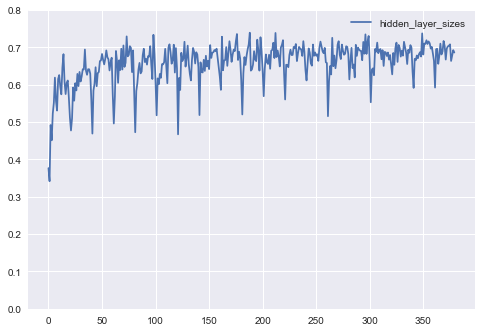

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np


# Configuration des valeurs utilisées sur l'axe des abscisses

scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]


# Configuration de la présentation des axes
plt.ylim([0,0.8])

axes = plt.gca()




    
plt.plot(scores)
plt.legend(['hidden_layer_sizes'])



In [ ]:
clf = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
clf.fit(source_train, cible_train.values.ravel())

In [ ]:
for i in range(0,10):
    print("prédit : ", clf.predict(source_test.values[i]),"\n attendu : ",cible_test.values[i])
